 Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import requests
import os
import re
from IPython.display import JSON 
import pandas as pd
import numpy as np
import seaborn as sns # for visualization
import matplotlib.pyplot as plt # for visualization
%matplotlib inline
sns.set(color_codes = True)

In [2]:
# In order to join the data accordinlly, I will remain with the sample of the City Bikes extracted during the yelp_foursquare_EDA notebook.
# From 248 stations retrieved from the City Bikes API (population), 10% of them were randomly retrieved as our sample.

df_city_bikes = pd.read_csv("df_city_bikes_mobi_network_sample.csv")
df_fsq_and_yelp = pd.read_csv("df_fsq_and_yelp_parsed_and_grouped_by_name.csv")

df_city_bikes_mobi_network_with_fsq_and_yelp = pd.merge(df_city_bikes, df_fsq_and_yelp, how = "outer")


In [3]:
df_city_bikes_mobi_network_with_fsq_and_yelp.to_csv("df_city_bikes_mobi_network_with_fsq_and_yelp.csv", index = False)

In [4]:
#  information about the data frame:

df_city_bikes_mobi_network_with_fsq_and_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       25 non-null     float64
 1   Id               25 non-null     object 
 2   Uid              25 non-null     float64
 3   Name             439 non-null    object 
 4   Empty Slots      25 non-null     float64
 5   Free Bikes       25 non-null     float64
 6   Last Updated     25 non-null     float64
 7   Renting Bikes    25 non-null     object 
 8   Returning Bikes  25 non-null     object 
 9   Latitude         25 non-null     float64
 10  Longitude        25 non-null     float64
 11  Timestamp        25 non-null     object 
 12  Distance         129 non-null    float64
 13  Latitude_x       129 non-null    float64
 14  Longitude_x      129 non-null    float64
 15  Latitude_y       328 non-null    float64
 16  Longitude_y      328 non-null    float64
 17  Rating          

This means that most of our dataset has non-null values so this is a good start as we have merged different data frames created from different APIs.

So, before starting to filling out missing values with a specific parameter, let's make sure this information is accurate by checking for missing data:

In [5]:
# Checking for missing data:

df_city_bikes_mobi_network_with_fsq_and_yelp.isnull().sum() / len(df_city_bikes_mobi_network_with_fsq_and_yelp)

Unnamed: 0         0.943052
Id                 0.943052
Uid                0.943052
Name               0.000000
Empty Slots        0.943052
Free Bikes         0.943052
Last Updated       0.943052
Renting Bikes      0.943052
Returning Bikes    0.943052
Latitude           0.943052
Longitude          0.943052
Timestamp          0.943052
Distance           0.706150
Latitude_x         0.706150
Longitude_x        0.706150
Latitude_y         0.252847
Longitude_y        0.252847
Rating             0.252847
Review Count       0.252847
dtype: float64

In [6]:
# Now, let's explore the first 3 rows of our data frame:

df_city_bikes_mobi_network_with_fsq_and_yelp.head()

,Unnamed: 0,Id,Uid,Name,Empty Slots,Free Bikes,Last Updated,Renting Bikes,Returning Bikes,Latitude,Longitude,Timestamp,Distance,Latitude_x,Longitude_x,Latitude_y,Longitude_y,Rating,Review Count
0,0.0,7a19c49f486d7c0c02b3685d7b240448,1.0,10th & Cambie,8.0,26.0,1.702876e+09,True,True,49.262487,-123.114397,2023-12-18T05:07:50.365000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,bf8408067b0e0c963f3ff526977bcef3,16.0,Pender & Burrard,9.0,16.0,1.702876e+09,True,True,49.287097,-123.118551,2023-12-18T05:07:50.469000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,fad9ebcf614dd1a72593a34072ff76f8,39.0,Helmcken & Burrard,10.0,4.0,1.702876e+09,True,True,49.279938,-123.127478,2023-12-18T05:07:49.987000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,be14efdc86dedd6a8cd338e78ab4e7c7,60.0,Bidwell & Burnaby,26.0,0.0,0.000000e+00,False,False,49.285260,-123.141809,2023-12-18T05:07:50.342000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,93c88a18c673e2c72a6afa93d6b89f18,74.0,10th & Main,7.0,11.0,1.702876e+09,True,True,49.262141,-123.101961,2023-12-18T05:07:50.457000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#  exploring our last 5 rows of our data frame:

df_city_bikes_mobi_network_with_fsq_and_yelp.tail()

,Unnamed: 0,Id,Uid,Name,Empty Slots,Free Bikes,Last Updated,Renting Bikes,Returning Bikes,Latitude,Longitude,Timestamp,Distance,Latitude_x,Longitude_x,Latitude_y,Longitude_y,Rating,Review Count
434,NaN,NaN,NaN,Yuji's From Japan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.268297,-123.186045,4.0,53.0
435,NaN,NaN,NaN,Zakkushi Dining On Main,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.249101,-123.101546,4.0,222.0
436,NaN,NaN,NaN,Zakkushi on Denman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.291080,-123.136430,4.0,258.0
437,NaN,NaN,NaN,Zarak By Afghan Kitchen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.266224,-123.100609,4.5,86.0
438,NaN,NaN,NaN,iDen & Quan Ju De Beijing Duck House,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.260210,-123.114845,3.5,112.0


In [8]:
#  check the data types to see if it is needed any cleaning of some information:

df_city_bikes_mobi_network_with_fsq_and_yelp.dtypes

Unnamed: 0         float64
Id                  object
Uid                float64
Name                object
Empty Slots        float64
Free Bikes         float64
Last Updated       float64
Renting Bikes       object
Returning Bikes     object
Latitude           float64
Longitude          float64
Timestamp           object
Distance           float64
Latitude_x         float64
Longitude_x        float64
Latitude_y         float64
Longitude_y        float64
Rating             float64
Review Count       float64
dtype: object

 the majority of the data is stored in either the "object" or "float" data type. To facilitate the visualization of certain information and facilitate analysis, it is imperative to convert the data we intend to examine into integers. With this in mind, we shall modify the data types solely for the parameters essential to our analysis. To accomplish this, let's outline our hypothesis as follows:

Null Hypothesis (H0): There is no discernible relationship between the "free bikes" variable and the quality of Points of Interest (POIs) in the vicinity.
Alternative Hypothesis (Ha): A relationship exists between the "free bikes" variable and the quality of POIs in the area.
Consequently, the parameters earmarked for modification are as follows:

Uid (station identification)
The variables "Empty slots," "free bikes," "renting bikes," and "returning bikes" since we will be using them in tandem to determine the station's capacity to provide bikes to its users.
"Review count," as it is also pertinent for comprehending the POIs obtained from the APIs.

In [9]:
# But, before doing this conversion, it is noted that there are some non-finite values as our conversion raised this type of error: "Cannot convert non-finite values (NA or inf) to integer".
# So, we need to replace non-finite values first before moving forward with our conversion of data types.
# replace them in a column with the number 0 as this is going to indicate us a lack of station information. 
# After that, we can change the data type to an int with the .astype() method (int8 was chosen because it uses less memory):

column_uid = df_city_bikes_mobi_network_with_fsq_and_yelp['Uid']
column_uid = column_uid.where(np.isfinite(column_uid), 0).astype(np.int8)
df_city_bikes_mobi_network_with_fsq_and_yelp['Uid'] = column_uid
display(df_city_bikes_mobi_network_with_fsq_and_yelp)

,Unnamed: 0,Id,Uid,Name,Empty Slots,Free Bikes,Last Updated,Renting Bikes,Returning Bikes,Latitude,Longitude,Timestamp,Distance,Latitude_x,Longitude_x,Latitude_y,Longitude_y,Rating,Review Count
0,0.0,7a19c49f486d7c0c02b3685d7b240448,1,10th & Cambie,8.0,26.0,1.702876e+09,True,True,49.262487,-123.114397,2023-12-18T05:07:50.365000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,bf8408067b0e0c963f3ff526977bcef3,16,Pender & Burrard,9.0,16.0,1.702876e+09,True,True,49.287097,-123.118551,2023-12-18T05:07:50.469000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,fad9ebcf614dd1a72593a34072ff76f8,39,Helmcken & Burrard,10.0,4.0,1.702876e+09,True,True,49.279938,-123.127478,2023-12-18T05:07:49.987000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,be14efdc86dedd6a8cd338e78ab4e7c7,60,Bidwell & Burnaby,26.0,0.0,0.000000e+00,False,False,49.285260,-123.141809,2023-12-18T05:07:50.342000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,93c88a18c673e2c72a6afa93d6b89f18,74,10th & Main,7.0,11.0,1.702876e+09,True,True,49.262141,-123.101961,2023-12-18T05:07:50.457000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,NaN,NaN,0,Yuji's From Japan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.268297,-123.186045,4.0,53.0
435,NaN,NaN,0,Zakkushi Dining On Main,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.249101,-123.101546,4.0,222.0
436,NaN,NaN,0,Zakkushi on Denman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.291080,-123.136430,4.0,258.0
437,NaN,NaN,0,Zarak By Afghan Kitchen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.266224,-123.100609,4.5,86.0


In [10]:
# Let's do now with the others using the same criteria: 0 as an indicator that there aren't no more empty slots available:

column_empty_slots_initial = df_city_bikes_mobi_network_with_fsq_and_yelp['Empty Slots']
column_empty_slots_final = column_empty_slots_initial.where(np.isfinite(column_empty_slots_initial), 0).astype(np.int8)
df_city_bikes_mobi_network_with_fsq_and_yelp['Empty Slots'] = column_empty_slots_final
# display(df_city_bikes_mobi_network_with_fsq_and_yelp)

In [11]:
# 0 as an indicator that there aren't no more free bikes to be rent:

column_free_bikes_initial = df_city_bikes_mobi_network_with_fsq_and_yelp['Free Bikes']
column_free_bikes_final = column_free_bikes_initial.where(np.isfinite(column_free_bikes_initial), 0).astype(np.int8)
df_city_bikes_mobi_network_with_fsq_and_yelp['Free Bikes'] = column_free_bikes_final
# display(df_city_bikes_mobi_network_with_fsq_and_yelp)

In [12]:
# 0 as an indicator that there aren't no more free bikes to be rent:

column_free_bikes_initial = df_city_bikes_mobi_network_with_fsq_and_yelp['Free Bikes']
column_free_bikes_final = column_free_bikes_initial.where(np.isfinite(column_free_bikes_initial), 0).astype(np.int8)
df_city_bikes_mobi_network_with_fsq_and_yelp['Free Bikes'] = column_free_bikes_final
# display(df_city_bikes_mobi_network_with_fsq_and_yelp)

In [13]:
# Ensure the column is numeric, invalid parsing will be set as NaN
column_renting_bikes_initial = pd.to_numeric(df_city_bikes_mobi_network_with_fsq_and_yelp['Renting Bikes'], errors='coerce')

# Use np.isfinite and replace non-finite values with 0
column_renting_bikes_final = column_renting_bikes_initial.where(np.isfinite(column_renting_bikes_initial), 0).astype(np.int8)

# Update the DataFrame
df_city_bikes_mobi_network_with_fsq_and_yelp['Renting Bikes'] = column_renting_bikes_final


In [14]:
print(type(df_city_bikes_mobi_network_with_fsq_and_yelp))

<class 'pandas.core.frame.DataFrame'>


In [15]:
# Also, let's use also the number 0 as an indicator that there are no review counts for a specific POI:

column_review_count_initial = df_city_bikes_mobi_network_with_fsq_and_yelp['Review Count']
# print(column_review_count)

column_review_count_final = column_review_count_initial.where(np.isfinite(column_review_count_initial), 0).astype(np.int8)
df_city_bikes_mobi_network_with_fsq_and_yelp['Review Count'] = column_review_count_final
print(df_city_bikes_mobi_network_with_fsq_and_yelp)

     Unnamed: 0                                Id  Uid  \
0           0.0  7a19c49f486d7c0c02b3685d7b240448    1   
1           1.0  bf8408067b0e0c963f3ff526977bcef3   16   
2           2.0  fad9ebcf614dd1a72593a34072ff76f8   39   
3           3.0  be14efdc86dedd6a8cd338e78ab4e7c7   60   
4           4.0  93c88a18c673e2c72a6afa93d6b89f18   74   
..          ...                               ...  ...   
434         NaN                               NaN    0   
435         NaN                               NaN    0   
436         NaN                               NaN    0   
437         NaN                               NaN    0   
438         NaN                               NaN    0   

                                     Name  Empty Slots  Free Bikes  \
0                           10th & Cambie            8          26   
1                        Pender & Burrard            9          16   
2                      Helmcken & Burrard           10           4   
3                      

In [16]:
# Finally, let's check to see if the cleaning and casting data type worked with our selected parameters: 

df_city_bikes_mobi_network_with_fsq_and_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       25 non-null     float64
 1   Id               25 non-null     object 
 2   Uid              439 non-null    int8   
 3   Name             439 non-null    object 
 4   Empty Slots      439 non-null    int8   
 5   Free Bikes       439 non-null    int8   
 6   Last Updated     25 non-null     float64
 7   Renting Bikes    439 non-null    int8   
 8   Returning Bikes  25 non-null     object 
 9   Latitude         25 non-null     float64
 10  Longitude        25 non-null     float64
 11  Timestamp        25 non-null     object 
 12  Distance         129 non-null    float64
 13  Latitude_x       129 non-null    float64
 14  Longitude_x      129 non-null    float64
 15  Latitude_y       328 non-null    float64
 16  Longitude_y      328 non-null    float64
 17  Rating          

In [17]:
# As my data frame is still very big, let's check its shape to see how much of this information can still be dropped or cleaned.

df_city_bikes_mobi_network_with_fsq_and_yelp.shape
df_city_bikes_mobi_network_with_fsq_and_yelp.describe

<bound method NDFrame.describe of      Unnamed: 0                                Id  Uid  \
0           0.0  7a19c49f486d7c0c02b3685d7b240448    1   
1           1.0  bf8408067b0e0c963f3ff526977bcef3   16   
2           2.0  fad9ebcf614dd1a72593a34072ff76f8   39   
3           3.0  be14efdc86dedd6a8cd338e78ab4e7c7   60   
4           4.0  93c88a18c673e2c72a6afa93d6b89f18   74   
..          ...                               ...  ...   
434         NaN                               NaN    0   
435         NaN                               NaN    0   
436         NaN                               NaN    0   
437         NaN                               NaN    0   
438         NaN                               NaN    0   

                                     Name  Empty Slots  Free Bikes  \
0                           10th & Cambie            8          26   
1                        Pender & Burrard            9          16   
2                      Helmcken & Burrard           10     

In [18]:
# Let's save our changes into a new .csv file to visualize it better before doing more EDA:

df_city_bikes_mobi_network_with_fsq_and_yelp.to_csv("df_city_bikes_mobi_network_with_fsq_and_yelp.csv", index=False)


In [19]:
# Let's save our changes into a new .csv file to visualize it better before doing more EDA:

df_city_bikes_mobi_network_with_fsq_and_yelp.to_csv("df_city_bikes_mobi_network_with_fsq_and_yelp.csv", index=False)


In [20]:
#  let's merge the latitude and longitude columns with the .fill() na method and drop them out afterwards:

df_city_bikes_mobi_network_with_fsq_and_yelp['Latitude'] = df_city_bikes_mobi_network_with_fsq_and_yelp['Latitude_x'].fillna(df_city_bikes_mobi_network_with_fsq_and_yelp['Latitude_y'])
df_city_bikes_mobi_network_with_fsq_and_yelp.drop(columns=['Latitude_x', 'Latitude_y'], inplace=True)


In [21]:
df_city_bikes_mobi_network_with_fsq_and_yelp['Longitude'] = df_city_bikes_mobi_network_with_fsq_and_yelp['Longitude_x'].fillna(df_city_bikes_mobi_network_with_fsq_and_yelp['Longitude_y'])
df_city_bikes_mobi_network_with_fsq_and_yelp.drop(columns=['Longitude_x', 'Longitude_y'], inplace=True)


In [22]:
df_city_bikes_mobi_network_with_fsq_and_yelp.to_csv("df_city_bikes_mobi_network_with_fsq_and_yelp.csv", index=False)

In [23]:
# Finally, let's fill with 0 the rest of the columns with null values (such as latitude, longitude, distance and ratings):

df_city_bikes_mobi_network_with_fsq_and_yelp.fillna(0, inplace=True)
print(df_city_bikes_mobi_network_with_fsq_and_yelp)

     Unnamed: 0                                Id  Uid  \
0           0.0  7a19c49f486d7c0c02b3685d7b240448    1   
1           1.0  bf8408067b0e0c963f3ff526977bcef3   16   
2           2.0  fad9ebcf614dd1a72593a34072ff76f8   39   
3           3.0  be14efdc86dedd6a8cd338e78ab4e7c7   60   
4           4.0  93c88a18c673e2c72a6afa93d6b89f18   74   
..          ...                               ...  ...   
434         0.0                                 0    0   
435         0.0                                 0    0   
436         0.0                                 0    0   
437         0.0                                 0    0   
438         0.0                                 0    0   

                                     Name  Empty Slots  Free Bikes  \
0                           10th & Cambie            8          26   
1                        Pender & Burrard            9          16   
2                      Helmcken & Burrard           10           4   
3                      

In [24]:
# Finally, I found that the column labeled "distance" retreived from foursquare doesn't give me much information because there is no reference. 
# So, let's drop it:

df_city_bikes_mobi_network_with_fsq_and_yelp.drop(columns='Distance', inplace=True)
print(df_city_bikes_mobi_network_with_fsq_and_yelp)

     Unnamed: 0                                Id  Uid  \
0           0.0  7a19c49f486d7c0c02b3685d7b240448    1   
1           1.0  bf8408067b0e0c963f3ff526977bcef3   16   
2           2.0  fad9ebcf614dd1a72593a34072ff76f8   39   
3           3.0  be14efdc86dedd6a8cd338e78ab4e7c7   60   
4           4.0  93c88a18c673e2c72a6afa93d6b89f18   74   
..          ...                               ...  ...   
434         0.0                                 0    0   
435         0.0                                 0    0   
436         0.0                                 0    0   
437         0.0                                 0    0   
438         0.0                                 0    0   

                                     Name  Empty Slots  Free Bikes  \
0                           10th & Cambie            8          26   
1                        Pender & Burrard            9          16   
2                      Helmcken & Burrard           10           4   
3                      

Finally, we have a joined dataframe more structured to be analyzed with only 434 rows and 12 columns.


In [25]:
# let's check the shape (distribution) of my data frame:

df_city_bikes_mobi_network_with_fsq_and_yelp.shape


(439, 14)

In [26]:
# And save the final dataset updated in a .csv file: 

df_city_bikes_mobi_network_with_fsq_and_yelp.to_csv("df_city_bikes_mobi_network_with_fsq_and_yelp.csv", index=False)


After replacing missing and Null values with 0, reshaping the data, modifying data types, removing columns, and renaming them (a data wrangling process), I am confident that we now possess a more optimized dataset. This dataset can be imported into a SQLite database, subsequently used for visualization, interpretation, and analysis.

In [27]:
#  let's just make some arrangements in our last dataframe:

df_fsq_and_yelp_parsed_and_grouped_by_name = pd.read_csv("df_fsq_and_yelp_parsed_and_grouped_by_name.csv")


In [28]:
#  let's merge the latitude and longitude columns with the .fill() na method and drop them out afterwards:

df_fsq_and_yelp_parsed_and_grouped_by_name['Latitude'] = df_fsq_and_yelp_parsed_and_grouped_by_name['Latitude_x'].fillna(df_fsq_and_yelp_parsed_and_grouped_by_name['Latitude_y'])
df_fsq_and_yelp_parsed_and_grouped_by_name.drop(columns=['Latitude_x', 'Latitude_y'], inplace=True)


In [29]:
# Again:

df_fsq_and_yelp_parsed_and_grouped_by_name['Longitude'] = df_fsq_and_yelp_parsed_and_grouped_by_name['Longitude_x'].fillna(df_fsq_and_yelp_parsed_and_grouped_by_name['Longitude_y'])
df_fsq_and_yelp_parsed_and_grouped_by_name.drop(columns=['Longitude_x', 'Longitude_y'], inplace=True)


In [30]:
df_fsq_and_yelp_parsed_and_grouped_by_name.fillna(0, inplace=True)

In [31]:
display(df_fsq_and_yelp_parsed_and_grouped_by_name)

,Name,Distance,Rating,Review Count,Latitude,Longitude
0,33 Acres Brewing Co,674.0,0.0,0.0,49.263877,-123.105307
1,49th Parallel Coffee Roast,877.0,0.0,0.0,49.259164,-123.100851
2,A Bread Affair,735.0,0.0,0.0,49.272480,-123.135889
3,Angus T,716.0,0.0,0.0,49.275871,-123.119875
4,Anh and Chi,750.0,4.0,653.0,49.255019,-123.100904
...,...,...,...,...,...,...
410,Yuji's From Japan,0.0,4.0,53.0,49.268297,-123.186045
411,Zakkushi Dining On Main,0.0,4.0,222.0,49.249101,-123.101546
412,Zakkushi on Denman,0.0,4.0,258.0,49.291080,-123.136430
413,Zarak By Afghan Kitchen,0.0,4.5,86.0,49.266224,-123.100609


In [32]:
df_fsq_and_yelp_parsed_and_grouped_by_name.to_csv("df_fsq_and_yelp_pois_parsed_and_grouped_by_name.csv", index=False)

 Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discovered through this visualization.

<Axes: xlabel='Free Bikes'>

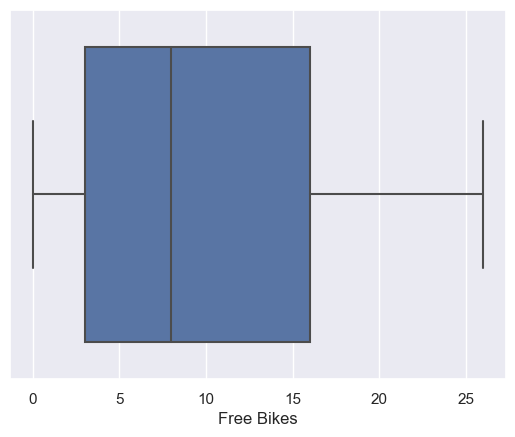

In [33]:
#Here are a few visualizations that aided my comprehension of the data sample's distribution and the identification of outliers:

df_city_bikes_mobi_network_sample = pd.read_csv("df_city_bikes_mobi_network_sample.csv")

sns.boxplot(x=df_city_bikes_mobi_network_sample['Free Bikes'])   

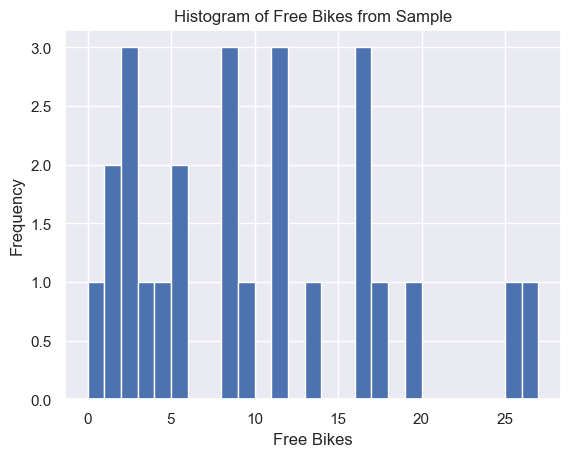

In [34]:
free_bikes_variable_sample = df_city_bikes_mobi_network_sample['Free Bikes']

plt.hist(free_bikes_variable_sample, bins=range(min(free_bikes_variable_sample), max(free_bikes_variable_sample) + 2, 1))

plt.xlabel('Free Bikes')
plt.ylabel('Frequency')
plt.title('Histogram of Free Bikes from Sample')
         
plt.show()

As depicted, the first graph is a boxplot, while the second one is a histogram. These visuals illustrate approximately 30 city bike stations within the city of Mobi, Vancouver, which were selected from the dataset labeled as city bike network. It's important to note that these graphics depict the entire station population. Initially, our dataset contained a total of 248 stations. However, the graphs presented here only represent our smaller subset of 30 stations. Since we conducted our analysis on this subset, these graphs reflect just 10% of the entire station population. To make a visual comparison between our sample and the population, please refer to the graphs below:

<Axes: xlabel='Free Bikes'>

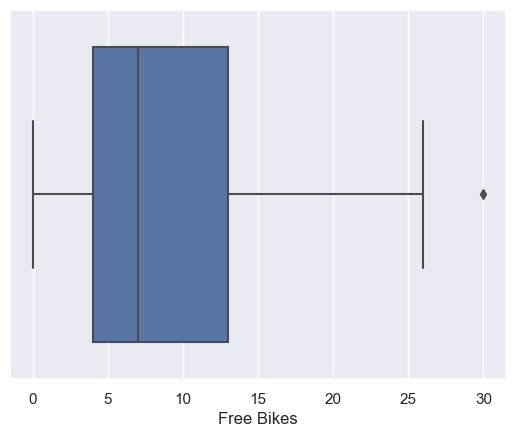

In [35]:
df_city_bikes_mobi_network_population = pd.read_csv("df_city_bikes_mobi_network_population.csv")

sns.boxplot(x=df_city_bikes_mobi_network_population['Free Bikes'])

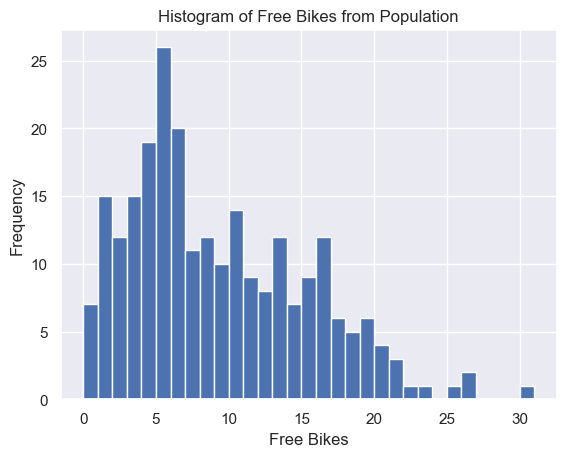

In [36]:
free_bikes_variable_population = df_city_bikes_mobi_network_population['Free Bikes']

plt.hist(free_bikes_variable_population, bins=range(min(free_bikes_variable_population), max(free_bikes_variable_population) + 2, 1))

plt.xlabel('Free Bikes')
plt.ylabel('Frequency')
plt.title('Histogram of Free Bikes from Population')
plt.show()


Comparing the box plot and histogram:

Both visualizations suggest a right-skewed distribution of free bikes.
The histogram provides a more detailed view of the distribution, showing the exact frequency of each bin, while the box plot summarizes the distribution with quartiles and outliers.
The peak in the histogram corresponds to the dense central region of the box plot.
Outliers in the box plot correspond to the bins with lower frequency on the right side of the histogram.
Both plots together give a comprehensive view of the data distribution, where the histogram gives detailed frequency counts, and the box plot provides a summary of the data's spread and central tendency

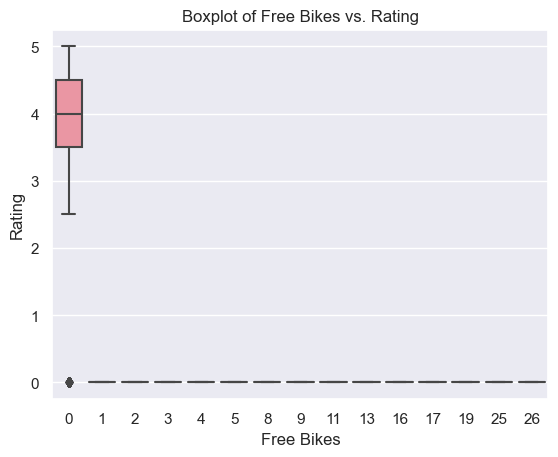

In [37]:
# Now, let's continue working with our sample. To make sure that our analysis is being done accordinglly with our theorethical approach and our hypothesis, let's add another variable to our analysis.
# As another variables, let's add the parameters of rating and review from the area that the POIs were found:

import seaborn as sns

sns.boxplot(x=df_city_bikes_mobi_network_with_fsq_and_yelp['Free Bikes'], y=df_city_bikes_mobi_network_with_fsq_and_yelp['Rating'])

plt.xlabel('Free Bikes')
plt.ylabel('Rating')
plt.title('Boxplot of Free Bikes vs. Rating')

plt.show()


It appears that stations with fewer "free bikes" for rent tend to have a higher number of ratings from Points of Interest (POIs) concentrated in the area. This could possibly account for the scarcity of available bikes in the vicinity, as more people are likely to be circulating around, visiting those places of interest. Consequently, let's create one additional visualization before exporting our database.

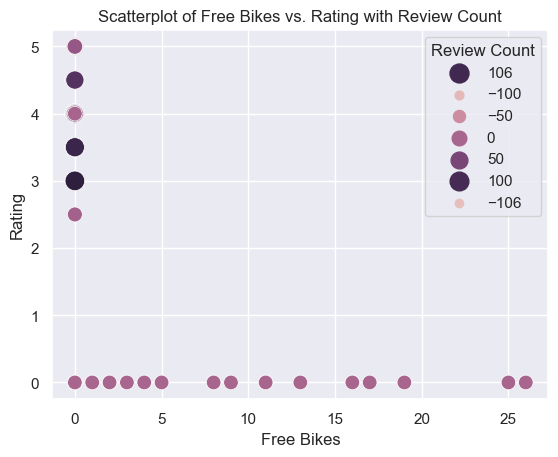

In [38]:
#  this scatterplot shows the relationship between free bikes, rating and review count:

sns.scatterplot(x=df_city_bikes_mobi_network_with_fsq_and_yelp['Free Bikes'], y=df_city_bikes_mobi_network_with_fsq_and_yelp['Rating'], size=df_city_bikes_mobi_network_with_fsq_and_yelp['Review Count'], sizes=(20, 200), hue=df_city_bikes_mobi_network_with_fsq_and_yelp['Review Count'])

plt.xlabel('Free Bikes')
plt.ylabel('Rating')
plt.title('Scatterplot of Free Bikes vs. Rating with Review Count')
plt.show()

In this plot, the color of each dot indicates the approximate amount of places with rating between 2 to 5 (this is the range) in related to the free bikes available to be rented in a station. The x-axis is labeled as 'Free Bikes' and y-axis as 'Rating'. As well, the color bar on the right of the graph with the label 'Review' is added to the plot to give us another layer of variable in our analysis. 
This graph also shows to us that where there are fewer bikes available to be rented there are POIs with a mediam number of rating and reviews.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [1]:
# First, let's connect to SQLite with Python:

import sqlite3

from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [2]:
path = "city_bikes_mobi_network_sample_db.sqlite"
connection = create_connection(path)

Connection to SQLite DB successful


In [3]:
# Second, let's create a function called "execute_query" which takes 2 arguments (the concetion and the path).
# This function is going to use a method called "cursor.exectute" which takes one argument (the query) to execute the queries in our database.

def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")
        

In [4]:
# Now, let's create our tables.

create_city_bikes_mobi_network_sample = """
CREATE TABLE IF NOT EXISTS city_bikes_mobi_network_sample (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  station_uid INTEGER,
  station_name TEXT NOT NULL,
  address TEXT NOT NULL,
  empty_slots INTEGER,
  free_bikes INTEGER,
  renting_bikes INTEGER,
  latitude FLOAT,
  longitude FLOAT
);
"""
execute_query(connection, create_city_bikes_mobi_network_sample)

Query executed successfully


In [6]:
# Let's create our table:

create_city_bikes_mobi_network_with_fsq_and_yelp = """
CREATE TABLE IF NOT EXISTS city_bikes_mobi_network_with_fsq_and_yelp (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  station_uid INTEGER,
  station_name TEXT NOT NULL,
  empty_slots INTEGER,
  free_bikes INTEGER,
  renting_bikes INTEGER,
  returning_bikes INTEGER,
  latitude FLOAT,
  longitude FLOAT,
  rating FLOAT,
  review_count INTEGER,
  FOREIGN KEY (id) REFERENCES city_bikes_recife_network_sample (id)
);
"""

execute_query(connection, create_city_bikes_mobi_network_with_fsq_and_yelp)

Query executed successfully


In [9]:
# Now, let's populate our table "city_bikes_mobi_network_with_fsq_and_yelp":
import pandas as pd

city_bikes_mobi_network_with_fsq_and_yelp = pd.read_csv("C:\\Final-Project-Statistical-Modelling-with-Python-main\\notebooks\\df_city_bikes_mobi_network_with_fsq_and_yelp.csv")

city_bikes_mobi_network_with_fsq_and_yelp.to_sql("city_bikes_mobi_network_with_fsq_and_yelp", connection, if_exists='replace', index=False)


439

In [10]:
# Now, let's create our last table with only the pois obtained in a radius of 1000m of our stations from the sample:

create_fsq_and_yelp_pois_parsed_and_grouped_by_name = """
CREATE TABLE IF NOT EXISTS city_bikes_mobi_network_with_fsq_and_yelp (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  pois_name TEXT NOT NULL,
  pois_distance FLOAT,
  pois_latitude FLOAT,
  pois_longitude FLOAT,
  pois_rating FLOAT,
  pois_review_count INTEGER
);
"""

execute_query(connection, create_fsq_and_yelp_pois_parsed_and_grouped_by_name)

Query executed successfully


In [12]:
# Now, let's populate our table "fsq_and_yelp_pois_parsed_and_grouped_by_name:

fsq_and_yelp_pois_parsed_and_grouped_by_name = pd.read_csv("C:/Final-Project-Statistical-Modelling-with-Python-main/notebooks/df_fsq_and_yelp_pois_parsed_and_grouped_by_name.csv")

fsq_and_yelp_pois_parsed_and_grouped_by_name.to_sql("fsq_and_yelp_pois_parsed_and_grouped_by_name", connection, if_exists='replace', index=False)

415

In [14]:
# Define a function to execute read queries
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except sqlite3.Error as e:
        print(f"Error executing query: {e}")
    finally:
        cursor.close()

# Establish a connection to your database
connection = sqlite3.connect("your_database.db")

# Now, let's populate our table "city_bikes_mobi_network_sample":
city_bikes_mobi_network_sample = pd.read_csv("C:/Final-Project-Statistical-Modelling-with-Python-main/notebooks/df_city_bikes_mobi_network_sample.csv")

city_bikes_mobi_network_sample.to_sql("city_bikes_mobi_network_sample", connection, if_exists='replace', index=False)

# Define your SQL query
select_network_sample = "SELECT * FROM city_bikes_mobi_network_sample"

# Execute the query using the defined function
network_sample = execute_read_query(connection, select_network_sample)

# Print the data
for station in network_sample:
    print(station)

# Close the connection when done
connection.close()


(0, '7a19c49f486d7c0c02b3685d7b240448', 1, '10th & Cambie', 8, 26, 1702876024, 1, 1, 49.262487, -123.114397, '2023-12-18T05:07:50.365000Z')
(1, 'bf8408067b0e0c963f3ff526977bcef3', 16, 'Pender & Burrard', 9, 16, 1702875874, 1, 1, 49.287097, -123.118551, '2023-12-18T05:07:50.469000Z')
(2, 'fad9ebcf614dd1a72593a34072ff76f8', 39, 'Helmcken & Burrard', 10, 4, 1702875697, 1, 1, 49.279938, -123.127478, '2023-12-18T05:07:49.987000Z')
(3, 'be14efdc86dedd6a8cd338e78ab4e7c7', 60, 'Bidwell & Burnaby', 26, 0, 0, 0, 0, 49.28526, -123.141809, '2023-12-18T05:07:50.342000Z')
(4, '93c88a18c673e2c72a6afa93d6b89f18', 74, '10th & Main', 7, 11, 1702876035, 1, 1, 49.262141, -123.101961, '2023-12-18T05:07:50.457000Z')
(5, '97b25faf822b93fdbf72da1d594c0288', 98, 'Carrall & Hastings', 0, 17, 1702876009, 1, 1, 49.28117, -123.104419, '2023-12-18T05:07:50.568000Z')
(6, '826af7eee4ce28b6fa4b4f0211305792', 110, '5th & Arbutus', 11, 2, 1702875942, 1, 1, 49.267222, -123.153157, '2023-12-18T05:07:50.136000Z')
(7, 'b9ab

In [19]:


# Define a function to execute read queries
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except sqlite3.Error as e:
        print(f"Error executing query: {e}")
    finally:
        cursor.close()

# Establish a connection to your database
connection = sqlite3.connect("your_database.db")

# Populate the first table "city_bikes_mobi_network_sample":
city_bikes_mobi_network_sample = pd.read_csv("C:/Final-Project-Statistical-Modelling-with-Python-main/notebooks/df_city_bikes_mobi_network_sample.csv")
city_bikes_mobi_network_sample.to_sql("city_bikes_mobi_network_sample", connection, if_exists='replace', index=False)

# Populate the second table "fsq_and_yelp_pois_parsed_and_grouped_by_name":
fsq_and_yelp_pois_parsed_and_grouped_by_name = pd.read_csv("C:/Final-Project-Statistical-Modelling-with-Python-main/notebooks/df_fsq_and_yelp_pois_parsed_and_grouped_by_name.csv")
fsq_and_yelp_pois_parsed_and_grouped_by_name.to_sql("fsq_and_yelp_pois_parsed_and_grouped_by_name", connection, if_exists='replace', index=False)

# Define SQL queries
select_network_sample = "SELECT * FROM city_bikes_mobi_network_sample"
select_pois = "SELECT * FROM fsq_and_yelp_pois_parsed_and_grouped_by_name"

# Execute the queries and print data
network_sample = execute_read_query(connection, select_network_sample)
network_pois = execute_read_query(connection, select_pois)

# Print data from the first table
print("Data from city_bikes_mobi_network_sample:")
for station in network_sample:
    print(station)

# Print data from the second table
print("\nData from fsq_and_yelp_pois_parsed_and_grouped_by_name:")
for poi in network_pois:
    print(poi)

# Close the connection when done
connection.close()


Data from city_bikes_mobi_network_sample:
(0, '7a19c49f486d7c0c02b3685d7b240448', 1, '10th & Cambie', 8, 26, 1702876024, 1, 1, 49.262487, -123.114397, '2023-12-18T05:07:50.365000Z')
(1, 'bf8408067b0e0c963f3ff526977bcef3', 16, 'Pender & Burrard', 9, 16, 1702875874, 1, 1, 49.287097, -123.118551, '2023-12-18T05:07:50.469000Z')
(2, 'fad9ebcf614dd1a72593a34072ff76f8', 39, 'Helmcken & Burrard', 10, 4, 1702875697, 1, 1, 49.279938, -123.127478, '2023-12-18T05:07:49.987000Z')
(3, 'be14efdc86dedd6a8cd338e78ab4e7c7', 60, 'Bidwell & Burnaby', 26, 0, 0, 0, 0, 49.28526, -123.141809, '2023-12-18T05:07:50.342000Z')
(4, '93c88a18c673e2c72a6afa93d6b89f18', 74, '10th & Main', 7, 11, 1702876035, 1, 1, 49.262141, -123.101961, '2023-12-18T05:07:50.457000Z')
(5, '97b25faf822b93fdbf72da1d594c0288', 98, 'Carrall & Hastings', 0, 17, 1702876009, 1, 1, 49.28117, -123.104419, '2023-12-18T05:07:50.568000Z')
(6, '826af7eee4ce28b6fa4b4f0211305792', 110, '5th & Arbutus', 11, 2, 1702875942, 1, 1, 49.267222, -123.153157

Look at the data before and after the join to validate your data.

This project component was quite time-consuming and remains unfinished. The task involved meticulous data cleaning and transformation. A significant challenge was integrating data from APIs with varying parameters for Points of Interest (POIs). Despite efforts to align the search parameters and filters (like sorting by popularity in Foursquare and best match in Yelp), connecting the data proved difficult. The process also involved handling a large dataset with missing values, duplicates, and imprecise latitude/longitude information, suggesting a need for further analysis to uncover more insights and patterns.

Initially, the APIs returned a substantial amount of unstructured data: 248 stations from City Bikes, and numerous results from Foursquare and Yelp, all categorized differently. When merging these data frames, some results were linked, while others were excluded. This led to the decision to keep separate data frames (and tables in SQLite3) to preserve the original structure of the information.

Currently, the focus is on exploring the potential relationship between the variable 'free bikes' and others like 'rating' and 'review count', particularly in the context of the type or category of the POI in Mobi. Preliminary analysis suggests a correlation between the availability of bikes at a station and the quality or popularity of nearby POIs, as indicated by their ratings and review counts. This pattern, where stations without available bikes are located near highly rated or reviewed POIs, warrants further investigation in the final dataset.